In [1]:
import pandas as pd

In [2]:
def read_csv(filename, comment='#'):
    l = 0
    lines = list()
    for line in open(filename):
        if line.startswith(comment):
            lines.append(l)
        l += 1
    return pd.read_csv(filename, skiprows=lines, header=None, delim_whitespace= True)

In [3]:
data_path = "/media/datasets/UTS/"
data_filename = "Platform_test01.txt"

In [5]:
data = read_csv(data_path+data_filename)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2019,11,4,8,55,49.012838,6.615455e+06,600050.7172,135.3568,9.70865,...,0.077,0.099,0.198,0.201,2.236,11,2.1,1.637,1.686,0.587
1,2019,11,4,8,55,49.017838,6.615455e+06,600050.7172,135.3568,9.70877,...,0.077,0.099,0.198,0.201,2.236,11,2.1,1.637,1.686,0.587
2,2019,11,4,8,55,49.022839,6.615455e+06,600050.7171,135.3568,9.70901,...,0.077,0.099,0.198,0.201,2.236,11,2.1,1.637,1.686,0.587
3,2019,11,4,8,55,49.027838,6.615455e+06,600050.7171,135.3568,9.70902,...,0.077,0.099,0.198,0.201,2.236,11,2.1,1.637,1.686,0.587
4,2019,11,4,8,55,49.032839,6.615455e+06,600050.7171,135.3568,9.70849,...,0.077,0.099,0.198,0.201,2.236,11,2.1,1.637,1.686,0.587


Headers

0 YYYY 1 MM 
2 DD 3 hh
4 mm 5 seconds
6 Northing (m) 7 Easting (m)
8 Hght (m) 9 Roll(deg)
10 Pitch(deg) 11 Head.(deg)
12 sPri(m) 13 sSec(m)
14 sHg(m) 15 sR(m)
16 sP(m) 17 sHe(m)
18 S 19 PDOP
20 rN(m) 21 rE(m) 22 rH(m)


In [7]:
timestamps = data[[0,1,2,3,4,5]]
data.drop([0,1,2,3,4,5], axis=1, inplace=True)

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

northing = data[6].values
easting = data[7].values
height = data[8].values

#This should plot pathkt
ax.scatter(easting, height,northing)
#to observe better ther heigh
plt.title("Easting vs height vs Northing")
ax.set_xlabel("easting")
ax.set_ylabel("height")


Text(0.5, 0, 'height')

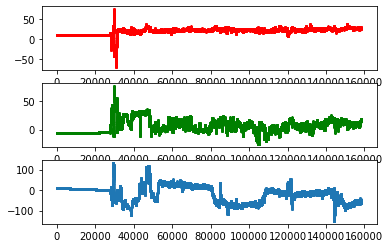

In [9]:
import numpy as np

f,ax =plt.subplots(3)
roll = data[9].values
pitch = data[10].values
yaw = data[11].values

timestamp = np.arange(roll.shape[0])
#This should plot pathkt
ax[0].scatter(timestamp,roll,c='r',s=1)
ax[1].scatter(timestamp,pitch, c='g', s=1)
ax[2].scatter(timestamp,yaw, s=1)



In [10]:
origin_xyz = [northing[0], easting[0], height[0]]
origin_xyz

[6615455.1041, 600050.7172, 135.3568]

In [11]:
norm_xyz = np.zeros((roll.shape[0],3))
norm_xyz[:,0] = northing
norm_xyz[:,1] = easting
norm_xyz[:,2] = height
norm_xyz[0]

array([6.61545510e+06, 6.00050717e+05, 1.35356800e+02])

In [12]:
#Center in first
norm_xyz[:,0] -= origin_xyz[0]
norm_xyz[:,1] -= origin_xyz[1]
norm_xyz[:,2] -= origin_xyz[2]

norm_xyz[0]

array([0., 0., 0.])

(158391,)


Text(0.5, 0, 'height')

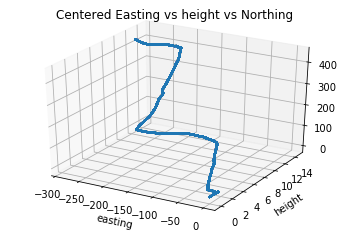

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#This should plot pathkt
print (norm_xyz[:,0].shape)
ax.scatter(norm_xyz[:,1],norm_xyz[:,2],norm_xyz[:,0],s=1)
#to observe better ther heigh
plt.title("Centered Easting vs height vs Northing")
ax.set_xlabel("easting")
ax.set_ylabel("height")

(158391,)


Text(0, 0.5, 'northing')

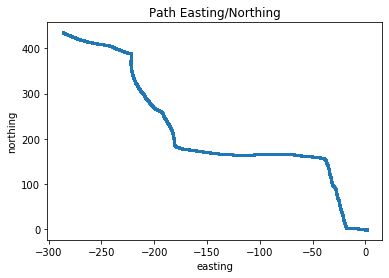

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

#This should plot pathkt
print (norm_xyz[:,0].shape)
ax.scatter(norm_xyz[:,1],norm_xyz[:,0],s=1)
#to observe better ther heigh
plt.title("Path Easting/Northing")
ax.set_xlabel("easting")
ax.set_ylabel("northing")

https://automating-gis-processes.github.io/2017/lessons/L7/retrieve-osm-data.html

In [15]:
import osmnx as ox

In [16]:
place_name = "norges miljø- og biovitenskapelige universitet, norway"
area = ox.gdf_from_place(place_name)
graph = ox.graph_from_place(place_name, which_result=2)

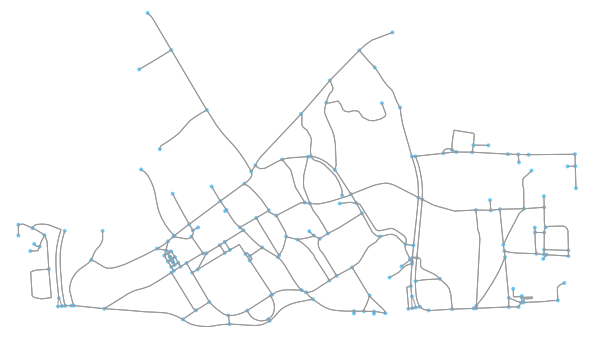

<Figure size 432x288 with 0 Axes>

In [17]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

In [18]:
nodes, edges = ox.graph_to_gdfs(graph)

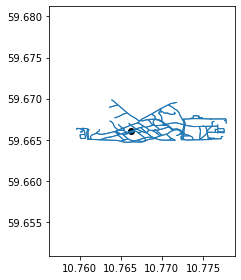

In [19]:
fig, ax = plt.subplots()

area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=1)#, edgecolor=b'#BC8F8F')
plt.tight_layout()

In [20]:
import utm

In [23]:
latlon = utm.conversion.to_latlon(easting,northing,32,'V')
lat = latlon[0]
lon = latlon[1]

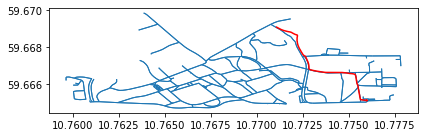

In [24]:
fig, ax = plt.subplots()
#area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=1)
ax.plot(lon, lat, c='r')

plt.tight_layout()
plt.savefig("/media/datasets/path.png")

In [25]:
import time
import datetime

In [26]:
time.clock()

/home/jose/anaconda3/envs/testing2/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


22.284022

In [27]:
datetime.datetime?

In [102]:
timestamps.head()

,0,1,2,3,4,5
0,2019,11,4,8,55,49.012838
1,2019,11,4,8,55,49.017838
2,2019,11,4,8,55,49.022839
3,2019,11,4,8,55,49.027838
4,2019,11,4,8,55,49.032839


In [28]:
from math import modf
timestamps_converted = list()

for i, row in timestamps.iterrows():
    milis, sec = modf(row[5])
    d = datetime.datetime(int(row[0]),int(row[1]),int(row[2]),
                          int(row[3]),int(row[4]),int(sec),
                         microsecond = int(milis*1000000))
    timestamps_converted.append(d)

In [29]:
import rosbag

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [30]:
r = rosbag.Bag("/media/datasets/nibio_summer_2019/long_video/2019-05-21-17-28-51.bag")

In [31]:
r.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'sensor_msgs/Image': '060021388200f6f0f447d0fcd9c64743', 'sensor_msgs/PointCloud2': '1158d486dd51d683ce2f1be655c3c181'}, topics={'/camera/color/image_raw': TopicTuple(msg_type='sensor_msgs/Image', message_count=3739, connections=1, frequency=29.76203451407811), '/camera/depth/image_rect_raw': TopicTuple(msg_type='sensor_msgs/Image', message_count=3770, connections=1, frequency=30.01162025243997), '/velodyne_points': TopicTuple(msg_type='sensor_msgs/PointCloud2', message_count=1245, connections=1, frequency=9.914569271081412)})

In [32]:
one_message = next(r.read_messages())

In [33]:
one_message.message.header

seq: 69
stamp: 
  secs: 1558452531
  nsecs: 574956179
frame_id: "camera_depth_optical_frame"

In [34]:
import time
ts_time = time.mktime(timestamps_converted[-1].timetuple())
timestamps_converted[-1]

datetime.datetime(2019, 11, 4, 9, 9, 1, 2647)

This is just an example

In [35]:
time_ros_mgs = one_message.message.header.stamp.to_sec()
time_ros_mgs = datetime.datetime.fromtimestamp(time_ros_mgs)
time_ros_mgs

datetime.datetime(2019, 5, 21, 17, 28, 51, 574956)

In [44]:
dt = timestamps_converted[-1] - time_ros_mgs
dt.total_seconds()

14398809.427691

Now convert messages from rosbag timestamp to datetime 

In [45]:
rostime_converted = list()

for i in r.read_messages(topics = "/velodyne_points"):
    time_ros_msg = i.message.header.stamp.to_sec()
    time_ros_msg = datetime.datetime.fromtimestamp(time_ros_msg)
    rostime_converted.append(time_ros_msg)
rostime_converted[-1]

datetime.datetime(2019, 5, 21, 17, 30, 57, 112348)

In [46]:
len(rostime_converted), len(timestamps_converted)

(1245, 158391)

In [ ]:
Get index array that matches better with timestamps....

In [47]:
import numpy as np

min_indexes = list()

for i in rostime_converted:
    j = [ (x-i).total_seconds() for x in timestamps_converted]
    min_indexes.append(np.argmin(j))
    #j = map(lambda x: (x-i).total_seconds(), timestamps_converted)

#min(map(i - timestamps_converted).total_seconds())

In [48]:
len(min_indexes) == len(rostime_converted)

True

In [56]:
from itertools import islice, count
n = 0
ros_msgs_gen = r.read_messages(topics = "/velodyne_points")

for i in min_indexes:
    ros_msg = next(islice(ros_msgs_gen, i, i+1))

ros_msg

BagMessage(topic='/velodyne_points', message=header: 
  seq: 1267
  stamp: 
    secs: 1558452657
    nsecs: 112348000
  frame_id: "velodyne"
height: 1
width: 14462
fields: 
  - 
    name: "x"
    offset: 0
    datatype: 7
    count: 1
  - 
    name: "y"
    offset: 4
    datatype: 7
    count: 1
  - 
    name: "z"
    offset: 8
    datatype: 7
    count: 1
  - 
    name: "intensity"
    offset: 16
    datatype: 7
    count: 1
  - 
    name: "ring"
    offset: 20
    datatype: 4
    count: 1
is_bigendian: False
point_step: 32
row_step: 462784
data: b'\xf2.Y\xc0\xa7\xa6\x9f\xbe\xd0\xc1i\xbf\xa6\x7f\x00\x00\x00\x00|B\x00\x00\x00\x00!\x00\x00\x008\x00\x00\x00N7\xb1\xc1\xa7\xc5\x01\xc0\xc9\xcc\xc6>\xa6\x7f\x00\x00\x00\x00\x80?\x08\x00\x00\x00!\x00\x00\x008\x00\x00\x00\x99\xa9c\xc0\x80d\xa6\xbe\x9c\x1dS\xbf\xa6\x7f\x00\x00\x00\x000A\x01\x00\x00\x00!\x00\x00\x008\x00\x00\x00\xbf\xc7\x8f\xc0\x1e\x8d\xd0\xbeU\x80`\xbf\xa6\x7f\x00\x00\x00\x00\x04B\x02\x00\x00\x00!\x00\x00\x008\x00\x00\x00O\xb8\x